<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-явных-дубликатов" data-toc-modified-id="Удаление-явных-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаление явных дубликатов</a></span></li><li><span><a href="#Приведение-типов" data-toc-modified-id="Приведение-типов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приведение типов</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вопрос-со-звёздочкой:" data-toc-modified-id="Вопрос-со-звёздочкой:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вопрос со звёздочкой:</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных
Необходимо защитить данные клиентов. 

Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а именно умножим признаки для модели на обратимую матрицу. Обоснуем, что так делать можно.

Нужно защитить данные так, чтобы качество моделей машинного обучения не ухудшилось.

In [23]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display

## Загрузка данных

Загрузим данные и посмотрим на них:

In [24]:
df = pd.read_csv('/datasets/insurance.csv')

In [25]:
def describe_df (df):
  display(df.head(5))
  print()
  print('Проверим наличие явных дубликатов: ')
  print('Явных дубликатов: ', df.duplicated().sum())
  print()
  print('Выведем общую информацию о таблице: ')
  print()  
  print(df.info())
  print()  
  print('Соотношение целевого признака: ', df['Страховые выплаты'].mean())  


In [26]:
describe_df (df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Проверим наличие явных дубликатов: 
Явных дубликатов:  153

Выведем общую информацию о таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Соотношение целевого признака:  0.148


Признаки: 
- пол, 
- возраст, 
- зарплата застрахованного,
- количество членов его семьи.

Целевой признак: 
- количество страховых выплат клиенту за последние 5 лет.

Пропусков в таблице нет, но есть явные дубликаты. Удалим их.
Типы столбцов совпадают с представленными данными для всех, кроме возраста. Переведём тип данных "возраст клиента" в целочисленный тип.

Также подробнее посмотрим на содержание столбцов


### Удаление явных дубликатов

In [27]:
df = df.drop_duplicates()

In [28]:
 df.duplicated().sum()

0

Явных дубликатов в данных больше нет

### Приведение типов

In [29]:
df['Возраст'] = df['Возраст'].astype('int')

In [30]:
df['Возраст'].dtypes

dtype('int64')

### Обзор данных

Посмотрим, какие числа присутствуют в таблице:

In [31]:
df['Пол'].value_counts()

0    2431
1    2416
Name: Пол, dtype: int64

array([[<AxesSubplot:title={'center':'Возраст'}>]], dtype=object)

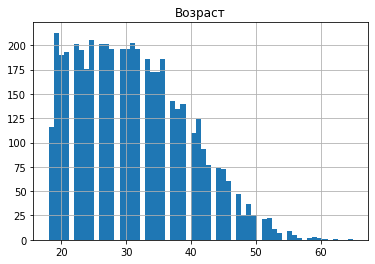

In [32]:
df.hist(column='Возраст', bins=60)  

array([[<AxesSubplot:title={'center':'Зарплата'}>]], dtype=object)

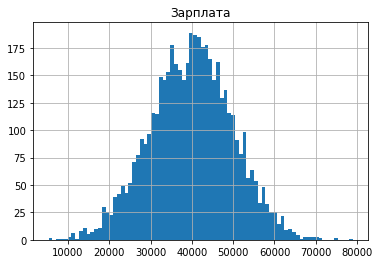

In [33]:
df.hist(column='Зарплата', bins=80)  

array([[<AxesSubplot:title={'center':'Члены семьи'}>]], dtype=object)

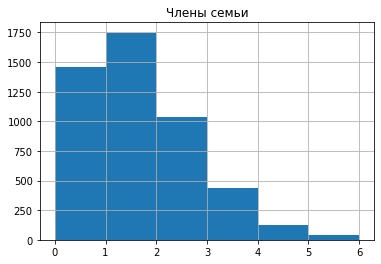

In [34]:
df.hist(column='Члены семьи', bins=6)  

In [35]:
df['Страховые выплаты'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

Данные во всех столбцах выглядят адекватно, экстремальных значений нет. Целевой признак перекошен: очень много людей не получали страховую выплату ни разу, и единицы получали её более двух раз.

## Умножение матриц

Умножим признаки на обратимую матрицу.
Докажем, что качество линейной регрессии не изменится. 

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:** 

Введём определения:
- Матрица признаков - $X$,
- Обратимая матрица - $P$,
- Матрица новых признаков $А$,
- Вектор целевого признака - $y$,
- Вектор весов целевого признака - $w$,
- Предсказание - $а$.

Основные свойства матриц (обратимых матриц):
* $(A^T)^T = A,(1)$
* $(AB)^T = B^TA^T ,(2)$


* $(A^{-1})^T = (A^T)^{-1},(3)$
* $(A+B)^T = A^T+B^T ,(4)$
* $(AB)^{-1} = B^{-1}A^{-1},(5)$

Введём новую матрицу признаков $A$, такую что $A=XP$. Тогда формула предсказвний

$a = X w,(6)$

$a_{1} = A w_{1},(7)$

Формула обучения линейной регрессии:

$w = (X^TX)^{-1}X^Ty,(8)$

$w_{1} = (A^TA)^{-1}A^Ty,(9)$ 


Подставим $w_{1}$ в (7):

$a_{1} = A(A^TA)^{-1}A^Ty$

Раскроем матрицу А: $A=XP$

$a_{1} = XP((XP)^T(XP))^{-1} (XP)^Ty$

$a_{1} = XP(P^T X^T XP)^{-1} P^T X^T y$

Воспользуемся свойством (5)

$a_{1} = XP( X^T XP)^{-1}(P^T)^{-1} P^T X^T y$

При умножении обратимой матрицы на обратную получаем единичную матрицу: $PP^{-1}=P^{-1}P=E$. 

$a_{1} = XP( X^T XP)^{-1} X^T y$

$a_{1} = XP P^{-1}( X^T X)^{-1} X^T y$

$a_{1} = X( X^T X)^{-1} X^T y (10)$

Посмотрим на формулу (8) и (10), можно произвести замену:

$a_{1} = Xw(11)$

Из формул (11) и (6):

$a_{1} = Xw = a$

$a_{1} = a$

Это значит, что при умножении матрицы признаков на некую обратимую матрицу Р предсказание линейной регрессии не изменится.




### Вопрос со звёздочкой:
а что будет, если домножить $X$ на $X^{-1}$? Естественно, в допущении, что $X$ квадратная и обратная к ней определена. Останутся ли веса $w$ такими же или изменятся?




Введём новую матрицу признаков $A$, такую что $A=XX^{-1}$. Тогда формула предсказаний:

$a = X w$

$a_{1} = XX^{-1} w_{1}$

Формула обучения линейной регрессии:

$w = (X^TX)^{-1}X^Ty$

$w_{1} = ((XX^{-1})^TXX^{-1})^{-1}(XX^{-1})^Ty$ 

Сократим: $XX^{-1} = E$

$a_{1} =  Ew_{1}$

$w_{1} = ((E)^TE)^{-1}(E)^Ty$

$a_{1} =  w_{1}$

$w_{1} = y$


В таком случае предсказание не будет зависеть от исходной матрицы признаков, а значит веса изменятся. Поскольку $w_{1} = y$, мы говорим, что вектор весов целевого признака равен вектору целевого признака, а предсказание тоже тогда равно вектору целевого признака. Это значит, что обученная модель на тренировочной выборке будет показывать идеальные ответы.


## Алгоритм преобразования

**Алгоритм**

- разделим выборку на тренировочную и тестовую.
- обучим регрессию на исходных данных.
- создадим квадратную матрицу Р. Размер матрицы равен количеству признаков в датафрейме: 4х4.
- Вычислим детерминант матрицы. Если он не равен нулю, то матрица обратима. Если детерминант окажется равным нулю, возвращаемся к предыдущему пункту.
- умножим исходные данные на матрицу Р.
- обучим линейную регрессию на преобразованных данных.
- сравним метрики.

**Обоснование**

В предыдущем разделе привели доказательство, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменится.
Чтобы умножить исходные данные, ширина матрицы признаков (количество столбцов) должна быть равля высоте матрицы, которую используем для шифровки. Чтобы матрица была обратимой, она должна быть квадратной и её детерминант должен быть не равен нулю.

Определи́тель (детермина́нт) в линейной алгебре — скалярная величина, имеет смысл только для квадратных матриц. 
Для матрицы 2x2 определитель вычисляется как:

\begin{align}
        det = \begin{pmatrix}
        a & c \\
        b & d 
        \end{pmatrix}= ad-bc
    \end{align}

## Проверка алгоритма

**Разобьём данные на выборки**

Разобъём данные на целевой признак и признаки, подводящие объект к целевому признаку.

Разделим объекты датафрейма на две выборки: тренировочную и тестовую.

In [36]:
def features_target_split (df, valid_ratio):
  """
  input:        df - датафрейм, который необходимо разделить
                valid_ratio - отношение разбиения выборок
  output:       features_train - тренировочные признаки
                features_test - тренировочный целевой признак
                target_train - тестовые признаки
                target_test - тестовый целевой признак 
  description:  функция разбивает датафрекйм сначала на признаки и целевой признак, 
                потом делит выборки на тренировочные и валидационные.
                Выводит на экран размерность выборок.
  """
  features = df.drop(['Страховые выплаты'], axis=1)
  target = df['Страховые выплаты']

  features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=valid_ratio, random_state=12345) 
  print('Для проверки посмотрим на размер выборок:')
  print('features_train.shape: ', features_train.shape)
  print('features_test.shape: ', features_test.shape)
  print('target_train.shape: ', target_train.shape)
  print('target_test.shape: ', target_test.shape)

  return features_train, features_test, target_train, target_test 

In [37]:
features_train, features_test, target_train, target_test = features_target_split (df, 0.2)

Для проверки посмотрим на размер выборок:
features_train.shape:  (3877, 4)
features_test.shape:  (970, 4)
target_train.shape:  (3877,)
target_test.shape:  (970,)


**Обучим линейную регрессию на исходных данных**

In [38]:
def model_lin_learn (features_train, target_train, features_test, target_test):
  """
  input:        features_train - признаки тренировочной выборки
                target_train - целевой признак тренировочной выборки
                features_test - признаки тестовой выборки
                target_test - целевой признак тестовой выборки
  output:       r2 - метрика r2_score
  description:  функция обучает линейую регрессию, рассчитывает и возвращает метрику r2_score 
                по  значениям целевых признаков и предсказаниям тренировочной и тестовой выборок
  """
  model = LinearRegression()
  model.fit(features_train,target_train) 
  predictions_valid = model.predict(features_test) 

  r2 = r2_score(target_test, predictions_valid)
  print("Метрика R2 модели линейной регрессии на тестовой выборке:", r2)

  return r2

In [39]:
r2_before_transform = model_lin_learn(features_train, target_train, features_test, target_test)

Метрика R2 модели линейной регрессии на тестовой выборке: 0.4160549216151235


**Создадим обратимую матрицу**

In [54]:
def cipher_features(features_train, features_test):
    n = features_train.shape[1]
    np.random.seed(42)
    
    code_matrix = np.random.randint(1, 10, (n,n))
    print("обратимая матрица: ")
    print(code_matrix)
    
    det = np.linalg.det(code_matrix)
    print("Детерминант")
    print(det)
    
    crypted_features_train = features_train @ code_matrix
    crypted_features_test = features_test @ code_matrix
    
    print()
    print('тренировочная выборка до и после кодирования: ')
    print(features_train.head(5))
    print(crypted_features_train.head(5))
    print()
    print('тестовая выборка до и после кодирования: ')
    print(features_test.head(5))
    print(crypted_features_test.head(5))
    return crypted_features_train, crypted_features_test, code_matrix

In [55]:
crypted_features_train, crypted_features_test, code_matrix = cipher_features(features_train, features_test)

обратимая матрица: 
[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]
 [3 6 5 2]]
Детерминант
-250.9999999999999

тренировочная выборка до и после кодирования: 
      Пол  Возраст  Зарплата  Члены семьи
640     0       28   29600.0            0
4510    0       26   57100.0            1
1623    1       38   41700.0            1
3460    1       23   34000.0            1
1820    0       45   35100.0            2
             0         1         2         3
640   148196.0  118484.0  236996.0  237024.0
4510  285685.0  228484.0  456987.0  457010.0
1623  208776.0  166924.0  333879.0  333911.0
3460  170171.0  136079.0  272174.0  272191.0
1820  175821.0  140547.0  281125.0  281164.0

тестовая выборка до и после кодирования: 
      Пол  Возраст  Зарплата  Члены семьи
1335    1       23   47200.0            0
3875    1       32   65900.0            0
166     1       33   33900.0            2
3003    0       39   19300.0            2
424     0       46   27500.0            2
             0         1         2     

**Обучим линейную регрессию для кодированных данных**

In [42]:
r2_after_transform = model_lin_learn(crypted_features_train, target_train, crypted_features_test, target_test)

Метрика R2 модели линейной регрессии на тестовой выборке: 0.4160549216155851


**Сравним метрики**

In [43]:
r2_before_transform

0.4160549216151235

In [44]:
r2_after_transform

0.4160549216155851

Метрики R2 для исходных и кодированных данных совпали с точностью до 12го знака после запятой. Расхождение в маленьких разрядах произошло из-за того, что оба числа типа float: числа с плавающей точкой. Для них нормальны  такие расхождения.

Делаем вывод, что качество линейной регрессии, обученной на исходных данных совпадает с качеством модели, обученной на кодированных данных.

## Вывод

Во время проекта была проделана работа:
- загрузили и проанализировали данные,
- провели предобработку данных,
- Ответили на вопрос проекта: `Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?` - Не изменится.
- Привели обоснование ответа,
- составили алгоритм для сравнения метрик, 
- разделили выборку на тренировочную и тестовую,
- обучили регрессию на исходных данных,
- создадали обратимую матрицу, закодировали с её помощью данные,
- обучили линейную регрессию на преобразованных данных,
- сравнили метрики: метрики совпали.